Codes are from https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/#data-pre-processing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
run_walk = pd.read_csv("./run_or_walk.csv")
run_walk.head()

In [2]:
X= run_walk.drop(['date', 'time', 'username', 'activity'], axis=1)
y = run_walk['activity']

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

In [3]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [4]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(trainX, trainY)

SGDClassifier(loss='log')

In [5]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.86


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


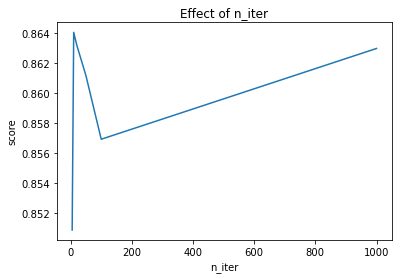

In [6]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [7]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(trainX, trainY)

SGDClassifier()

In [8]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.86


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


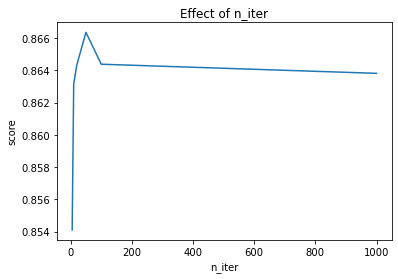

In [9]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [11]:
from sklearn import svm

In [12]:
start = time.time()
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(trainX, trainY)
stop = time.time()
print(f"Training time for linear SVM with SGD training: {stop - start}s")

start = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(trainX, trainY)
stop = time.time()
print(f"Training time for linear SVM without SGD training: {stop - start}s")

Training time for linear SVM with SGD training: 0.07883691787719727s
Training time for linear SVM without SGD training: 38.131558895111084s


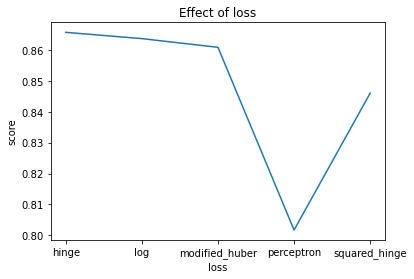

In [13]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(trainX, trainY)
    scores.append(clf.score(testX, testY))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [14]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(trainX, trainY)

print(grid.best_params_) 

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [15]:
grid_predictions = grid.predict(testX) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

Accuracy: 0.86
